In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
enrol = pd.read_csv(r"C:\Users\Omnan\Downloads\Ad.csv")
demo = pd.read_csv(r"C:\Users\Omnan\Downloads\add.csv")
bio  = pd.read_csv(r"C:\Users\Omnan\Downloads\adb.csv")

print(enrol.shape)
print(demo.shape)
print(bio.shape)




(93184, 7)
(183245, 6)
(424731, 6)


In [3]:
enrol['date'] = pd.to_datetime(enrol['date'], dayfirst=True)
demo['date'] = pd.to_datetime(demo['date'], dayfirst=True)
bio['date'] = pd.to_datetime(bio['date'], dayfirst=True)


In [4]:
enrol['district'] = enrol['district'].str.strip()
demo['district'] = demo['district'].str.strip()
bio['district'] = bio['district'].str.strip()


In [5]:
enrol['total_enrol'] = enrol[['age_0_5','age_5_17','age_18_greater']].sum(axis=1)
demo['total_demo'] = demo[['demo_age_5_17','demo_age_17_']].sum(axis=1)
bio['total_bio'] = bio[['bio_age_5_17','bio_age_17_']].sum(axis=1)

In [6]:
enrol_dist = enrol.groupby('district')['total_enrol'].sum().reset_index()
demo_dist = demo.groupby('district')['total_demo'].sum().reset_index()
bio_dist = bio.groupby('district')['total_bio'].sum().reset_index()


In [7]:
print(enrol.isnull().sum())
print(demo.isnull().sum())
print(bio.isnull().sum())

date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
total_enrol       0
dtype: int64
date             0
state            0
district         0
pincode          0
demo_age_5_17    0
demo_age_17_     0
total_demo       0
dtype: int64
date            0
state           0
district        0
pincode         0
bio_age_5_17    0
bio_age_17_     0
total_bio       0
dtype: int64


In [8]:
enrol.drop_duplicates(inplace=True)
demo.drop_duplicates(inplace=True)
bio.drop_duplicates(inplace=True)



In [9]:
enrol_dist = enrol.groupby('district')['total_enrol'].sum().reset_index()
demo_dist = demo.groupby('district')['total_demo'].sum().reset_index()
bio_dist = bio.groupby('district')['total_bio'].sum().reset_index()


In [10]:
final_df = enrol_dist.merge(demo_dist,on='district')
final_df = final_df.merge(bio_dist,on='district')

final_df.head()


,district,total_enrol,total_demo,total_bio
0,Ahilyanagar,23,2899,2995
1,Ahmadnagar,14766,168759,461382
2,Ahmed Nagar,400,4365,11181
3,Akola,5913,47362,222595
4,Amravati,8309,74933,408057


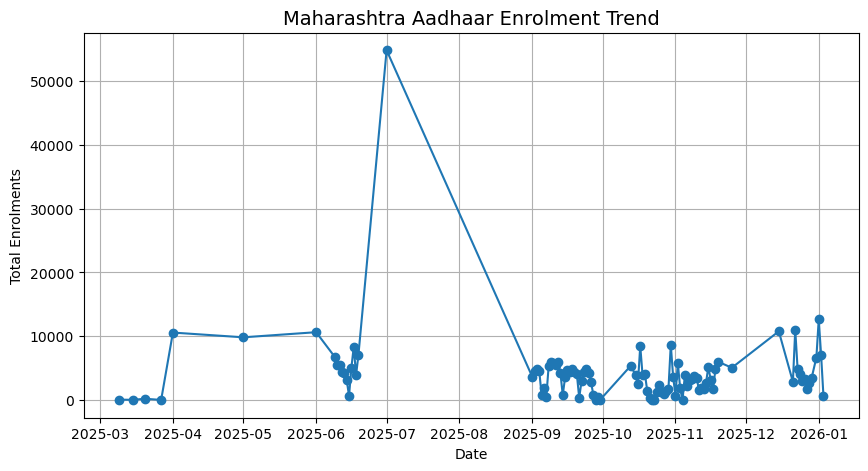

In [11]:
trend = enrol.groupby('date')['total_enrol'].sum()
plt.figure(figsize=(10,5))
plt.plot(trend.index, trend.values, marker='o')
plt.title("Maharashtra Aadhaar Enrolment Trend", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Total Enrolments")
plt.grid()
plt.show()

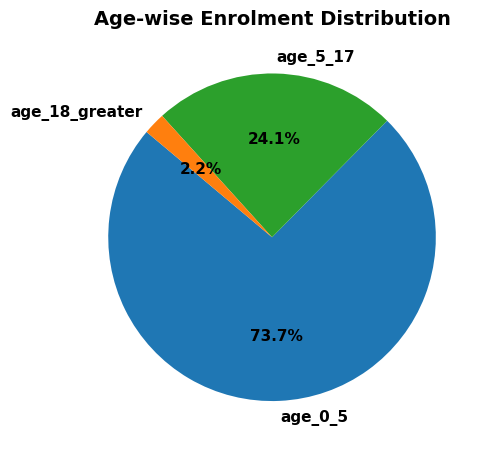

In [12]:
import matplotlib.pyplot as plt


age_sum = enrol[['age_0_5','age_5_17','age_18_greater']].sum()
colors = ['#1f77b4', '#2ca02c', '#ff7f0e']
plt.figure(figsize=(5,5))
plt.pie(
    age_sum,
    labels=age_sum.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 11, 'weight': 'bold'}
)
plt.title("Age-wise Enrolment Distribution", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


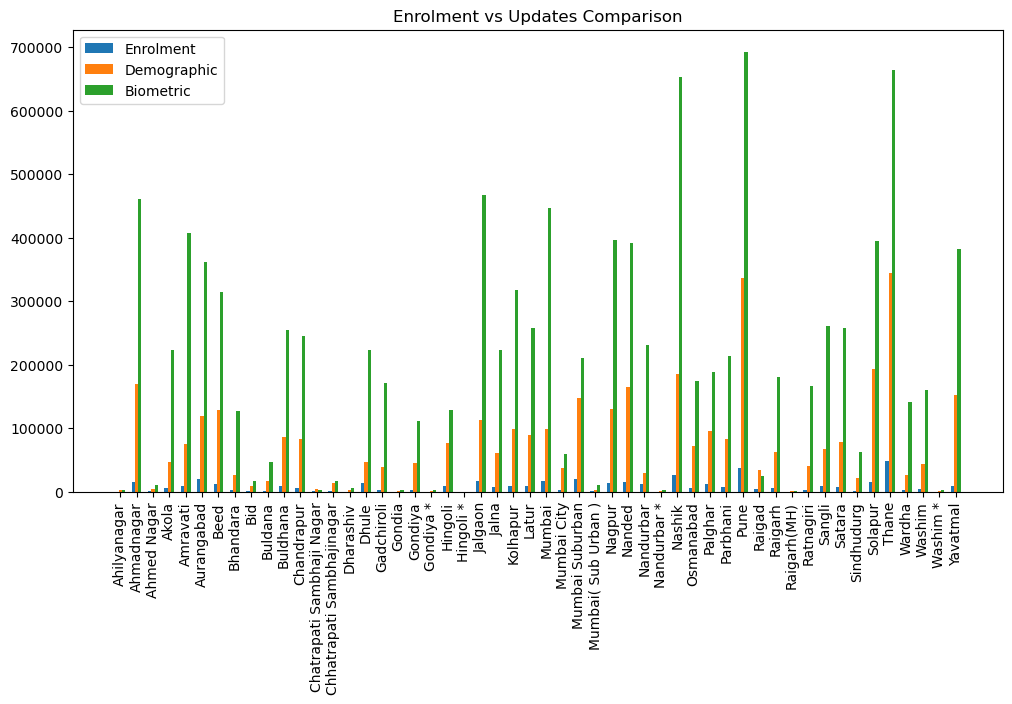

In [13]:
x = np.arange(len(final_df['district']))

plt.figure(figsize=(12,6))

plt.bar(x-0.2, final_df['total_enrol'], width=0.2, label='Enrolment')
plt.bar(x, final_df['total_demo'], width=0.2, label='Demographic')
plt.bar(x+0.2, final_df['total_bio'], width=0.2, label='Biometric')

plt.xticks(x, final_df['district'], rotation=90)
plt.legend()
plt.title("Enrolment vs Updates Comparison")
plt.show()


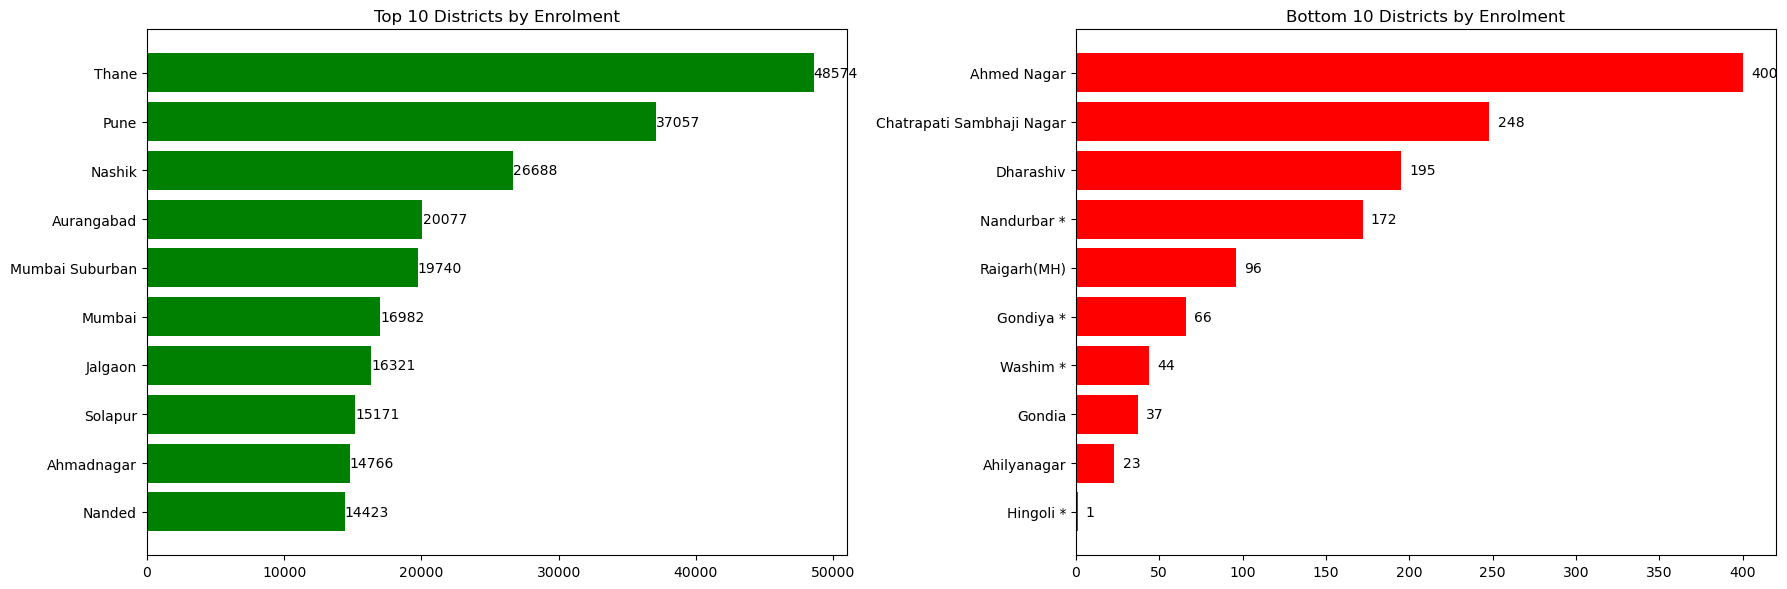

In [31]:
sorted_enrol = final_df.sort_values(by='total_enrol', ascending=False)

top10_enrol = sorted_enrol.head(10)
bottom10_enrol = sorted_enrol.tail(10)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].barh(top10_enrol['district'], top10_enrol['total_enrol'], color='green')
axes[0].set_title("Top 10 Districts by Enrolment")
axes[0].invert_yaxis()

for i, v in enumerate(top10_enrol['total_enrol']):
    axes[0].text(v + 5, i, str(v), va='center')

axes[1].barh(bottom10_enrol['district'], bottom10_enrol['total_enrol'], color='red')
axes[1].set_title("Bottom 10 Districts by Enrolment")
axes[1].invert_yaxis()

for i, v in enumerate(bottom10_enrol['total_enrol']):
    axes[1].text(v + 5, i, str(v), va='center')

plt.tight_layout()
plt.show()


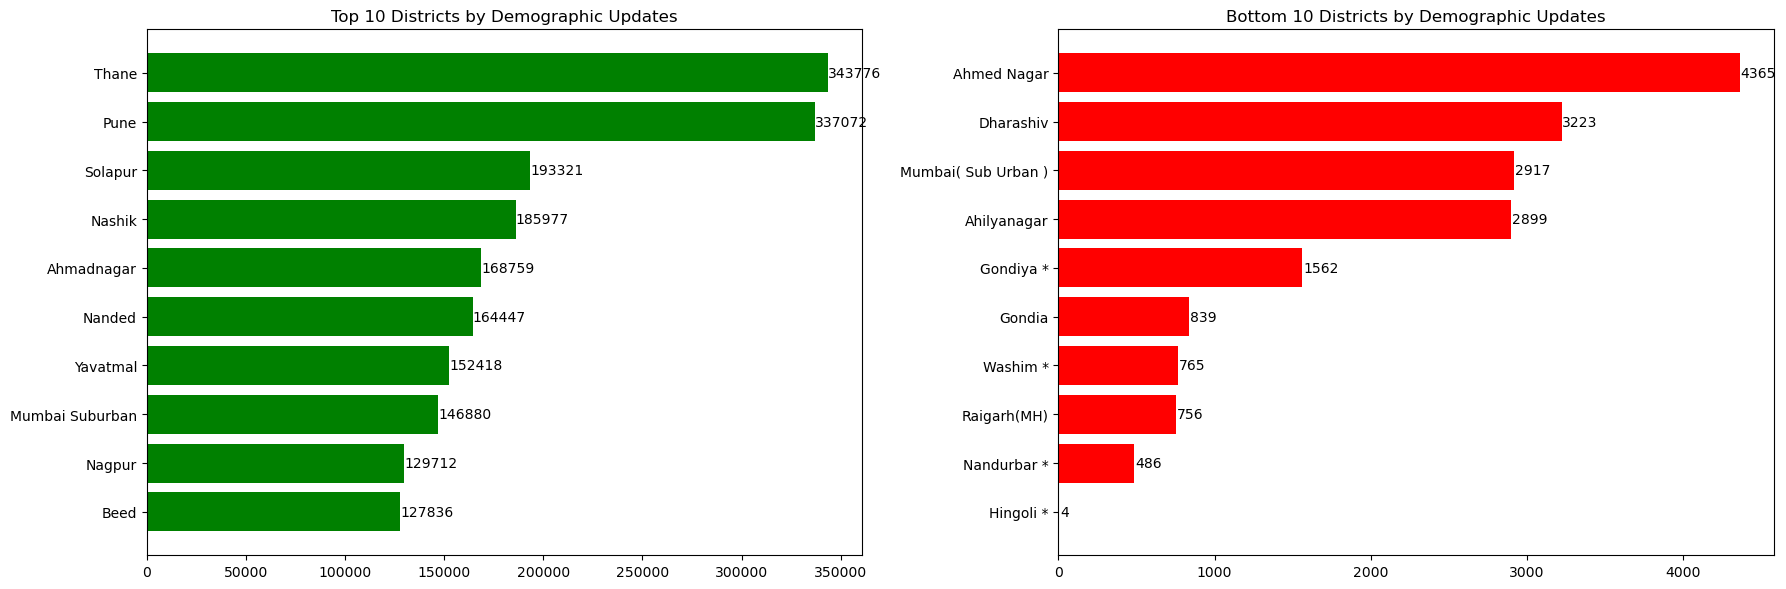

In [15]:
sorted_demo = final_df.sort_values(by='total_demo', ascending=False)

top10_demo = sorted_demo.head(10)
bottom10_demo = sorted_demo.tail(10)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].barh(top10_demo['district'], top10_demo['total_demo'], color='green')
axes[0].set_title("Top 10 Districts by Demographic Updates")
axes[0].invert_yaxis()

for i, v in enumerate(top10_demo['total_demo']):
    axes[0].text(v + 5, i, str(v), va='center')
axes[1].barh(bottom10_demo['district'], bottom10_demo['total_demo'], color='red')
axes[1].set_title("Bottom 10 Districts by Demographic Updates")
axes[1].invert_yaxis()
for i, v in enumerate(bottom10_demo['total_demo']):
    axes[1].text(v + 5, i, str(v), va='center')
plt.tight_layout()
plt.show()


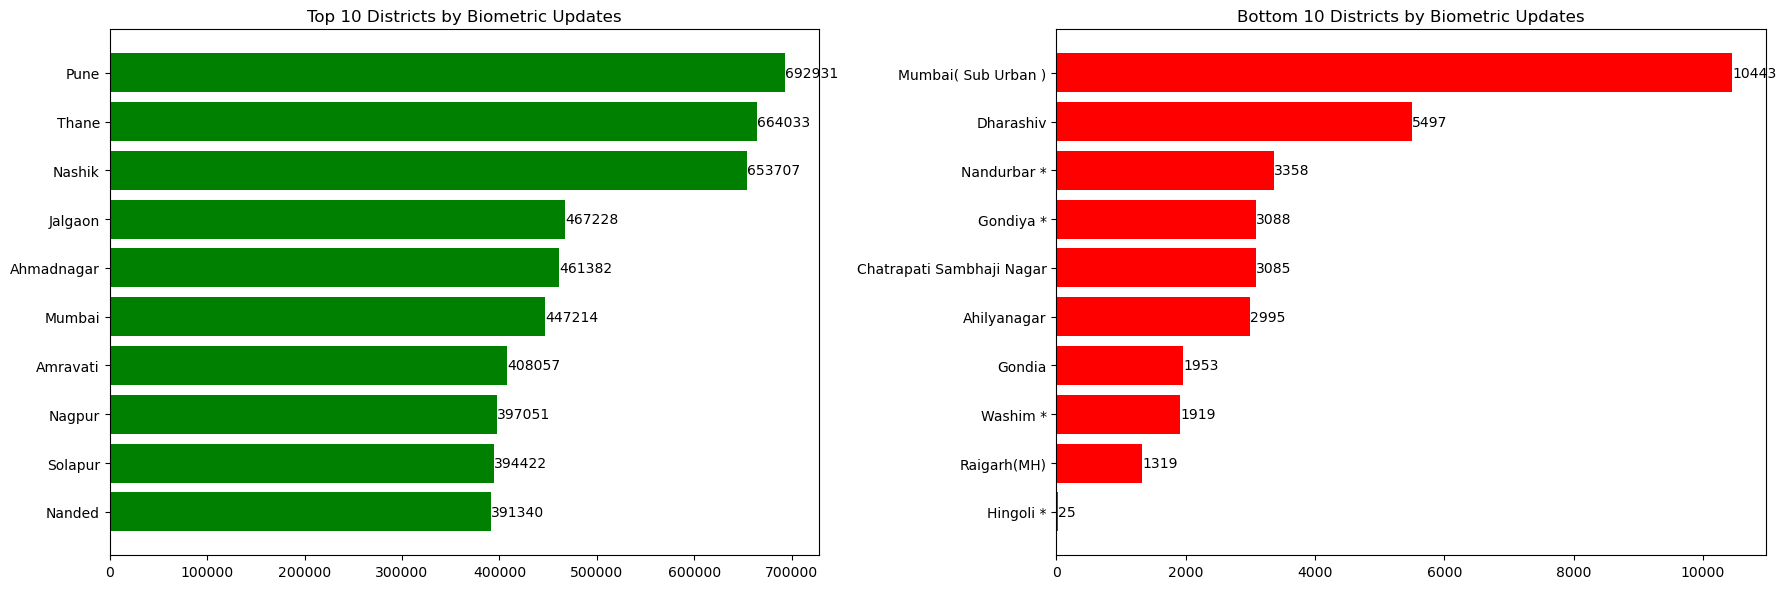

In [16]:
sorted_bio = final_df.sort_values(by='total_bio', ascending=False)
top10_bio = sorted_bio.head(10)
bottom10_bio = sorted_bio.tail(10)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].barh(top10_bio['district'], top10_bio['total_bio'], color='green')
axes[0].set_title("Top 10 Districts by Biometric Updates")
axes[0].invert_yaxis()

for i, v in enumerate(top10_bio['total_bio']):
    axes[0].text(v + 5, i, str(v), va='center')

axes[1].barh(bottom10_bio['district'], bottom10_bio['total_bio'], color='red')
axes[1].set_title("Bottom 10 Districts by Biometric Updates")
axes[1].invert_yaxis()

for i, v in enumerate(bottom10_bio['total_bio']):
    axes[1].text(v + 5, i, str(v), va='center')
plt.tight_layout()
plt.show()


In [17]:
area_map = {
    'Mumbai':'Metro',
    'Pune':'Metro',
    'Thane':'Metro',
    'Nagpur':'Metro',
    'Nashik':'Metro',

    'Aurangabad':'Semi-Urban',
    'Kolhapur':'Semi-Urban',
    'Solapur':'Semi-Urban',
    'Satara':'Semi-Urban',
    'Amravati':'Semi-Urban'
}

final_df['area_type'] = final_df['district'].map(area_map)
final_df['area_type'].fillna('Rural', inplace=True)


C:\Users\omnan\AppData\Local\Temp\ipykernel_26684\2105738515.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['area_type'].fillna('Rural', inplace=True)


In [29]:
avg_activity = final_df.groupby('area_type')[['total_enrol','total_demo','total_bio']].mean().reset_index()
avg_activity.columns = ['Area Type', 'Avg Enrolment', 'Avg Demographic Update', 'Avg Biometric Update']
print(avg_activity)


    Area Type  Avg Enrolment  Avg Demographic Update  Avg Biometric Update
0       Metro   28709.600000           219092.400000         570987.200000
1       Rural    5457.619048            51100.571429         147070.809524
2  Semi-Urban   12011.600000           112753.200000         347775.400000


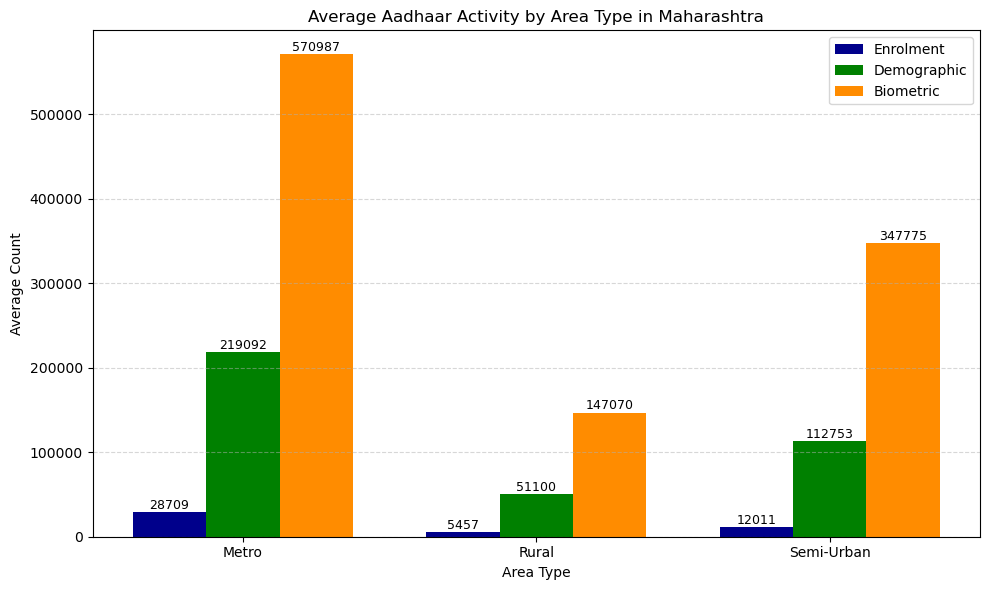

In [32]:
x = np.arange(len(avg_activity))
width = 0.25
plt.figure(figsize=(10,6))
bars1 = plt.bar(x - width, avg_activity['Avg Enrolment'], width=width, color='darkblue', label='Enrolment')
bars2 = plt.bar(x, avg_activity['Avg Demographic Update'], width=width, color='green', label='Demographic')
bars3 = plt.bar(x + width, avg_activity['Avg Biometric Update'], width=width, color='darkorange', label='Biometric')
for bar in bars1 + bars2 + bars3:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, f'{int(height)}', ha='center', va='bottom', fontsize=9)
plt.xticks(x, avg_activity['Area Type'])
plt.xlabel('Area Type')
plt.ylabel('Average Count')
plt.title('Average Aadhaar Activity by Area Type in Maharashtra')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


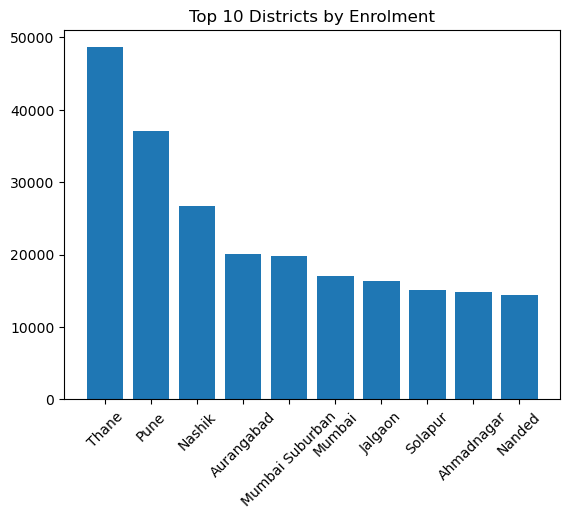

In [20]:
top10 = final_df.sort_values(by='total_enrol',ascending=False).head(10)

plt.bar(top10['district'],top10['total_enrol'])
plt.xticks(rotation=45)
plt.title("Top 10 Districts by Enrolment")
plt.show()


In [21]:
print("Thanks for viewing this code notebook ")

Thanks for viewing this code notebook 


In [22]:
heatmap_df = final_df[['district', 'total_enrol', 'total_demo', 'total_bio']]
heatmap_df = heatmap_df.set_index('district')


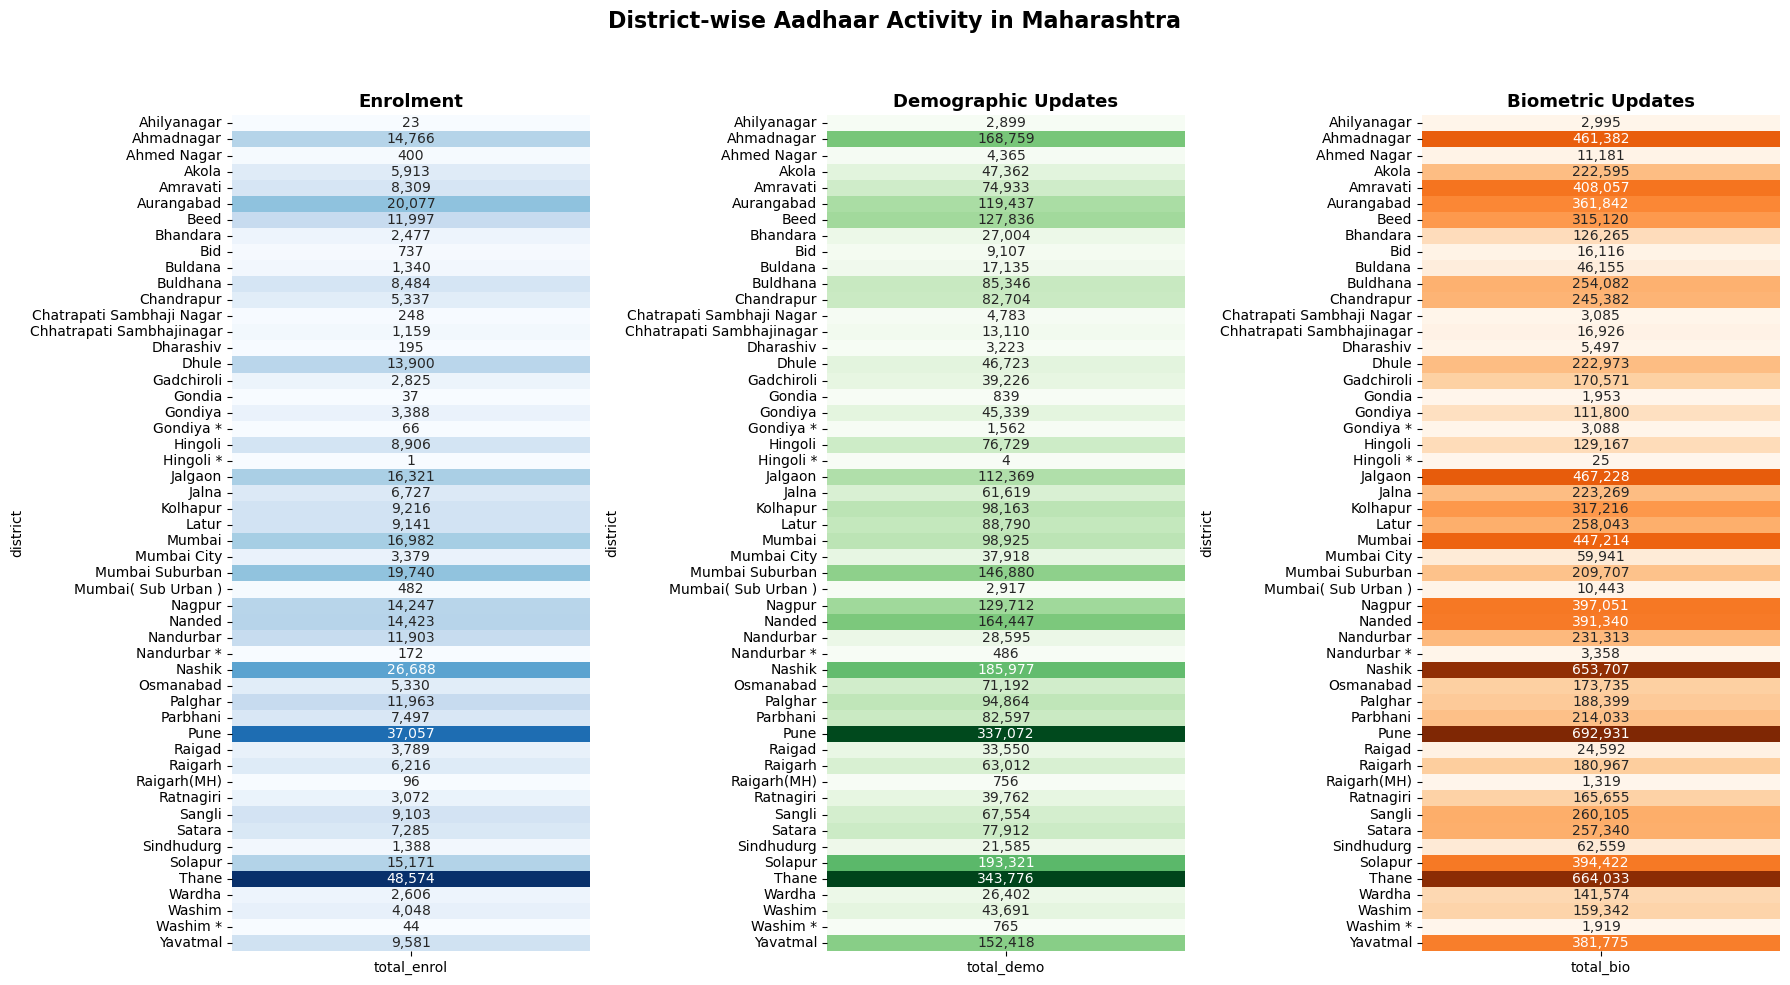

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(18, 10))

sns.heatmap(
    heatmap_df[['total_enrol']],
    cmap='Blues',
    ax=ax[0],
    annot=True,
    fmt=',',
    cbar=False
)
ax[0].set_title("Enrolment", fontsize=13, weight='bold')

sns.heatmap(
    heatmap_df[['total_demo']],
    cmap='Greens',
    ax=ax[1],
    annot=True,
    fmt=',',
    cbar=False
)
ax[1].set_title("Demographic Updates", fontsize=13, weight='bold')

sns.heatmap(
    heatmap_df[['total_bio']],
    cmap='Oranges',
    ax=ax[2],
    annot=True,
    fmt=',',
    cbar=False
)
ax[2].set_title("Biometric Updates", fontsize=13, weight='bold')

plt.suptitle("District-wise Aadhaar Activity in Maharashtra", fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


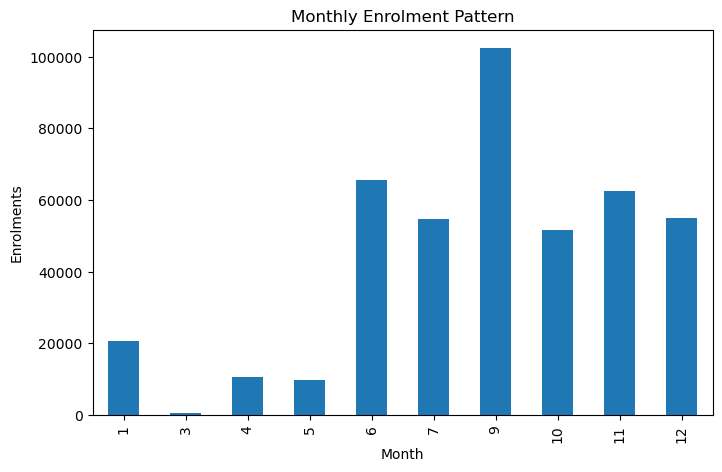

In [25]:
enrol['month'] = enrol['date'].dt.month
monthly = enrol.groupby('month')['total_enrol'].sum()

plt.figure(figsize=(8,5))
monthly.plot(kind='bar')
plt.title("Monthly Enrolment Pattern")
plt.xlabel("Month")
plt.ylabel("Enrolments")
plt.show()


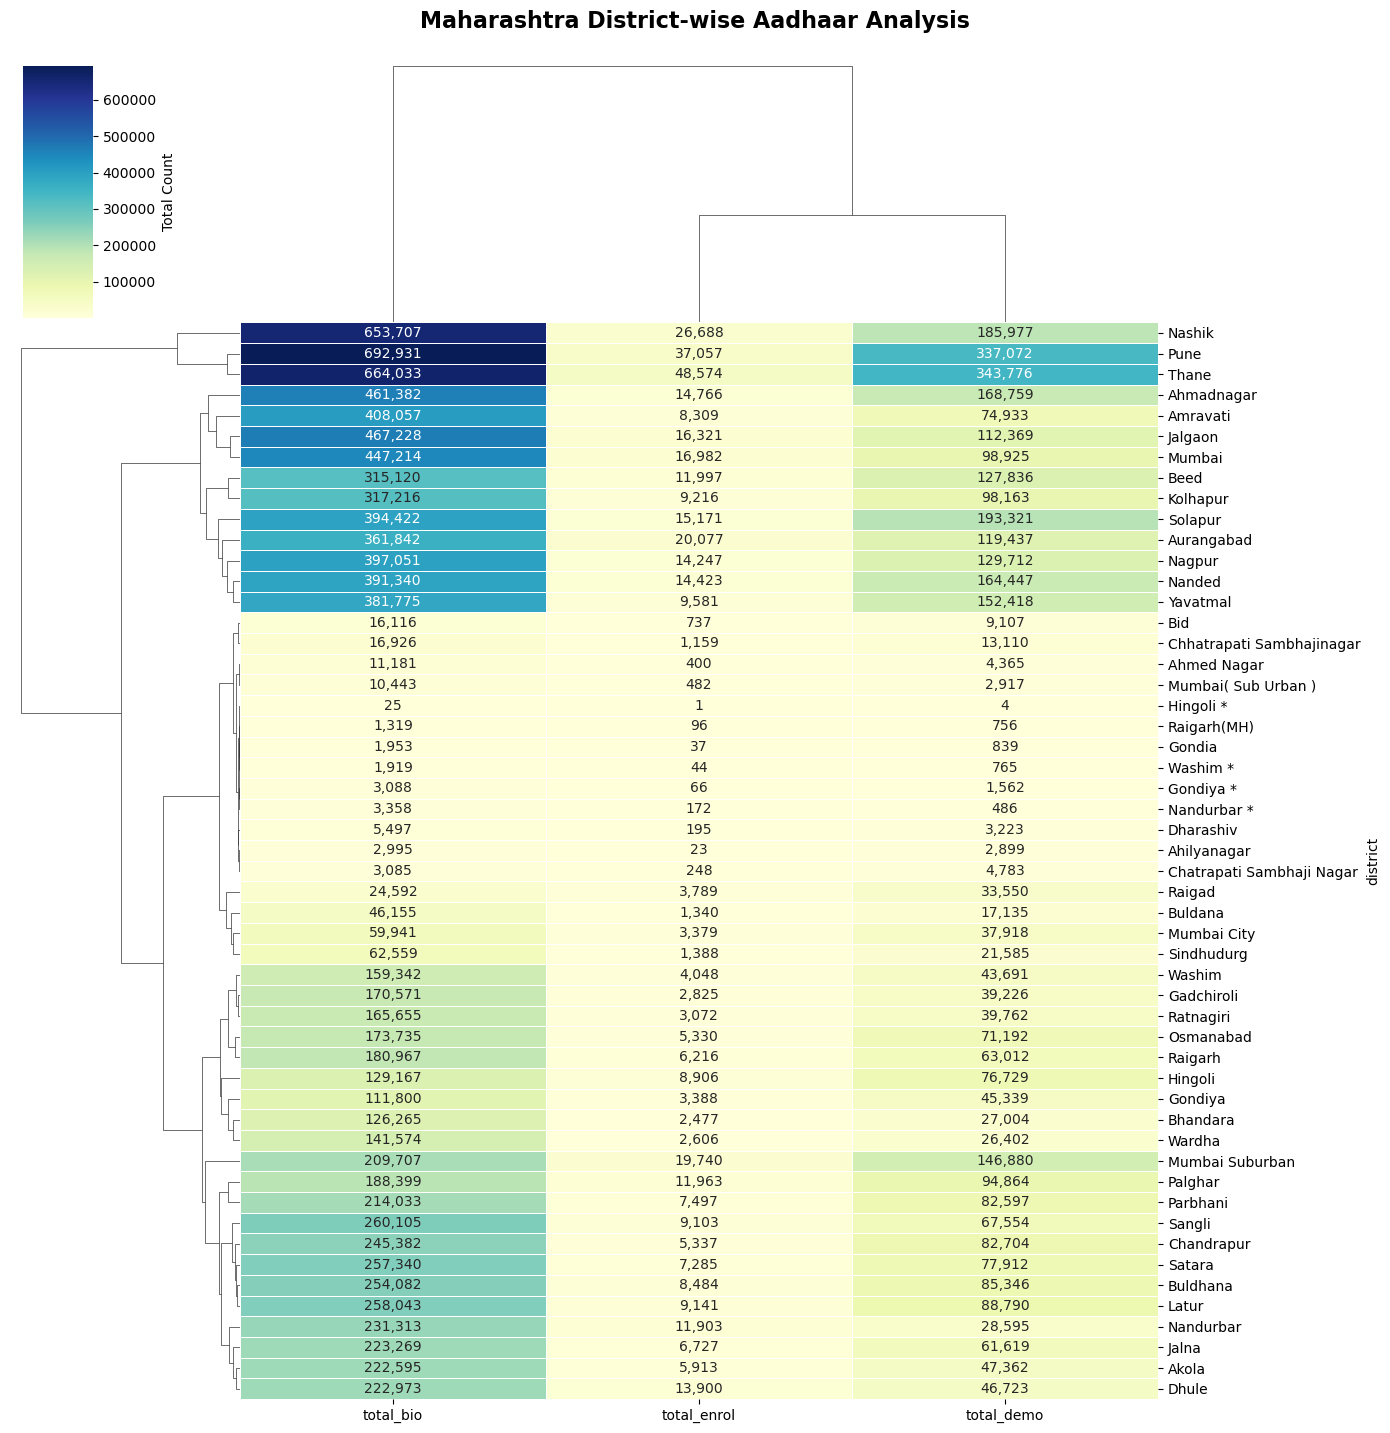

In [26]:
sns.clustermap(
    heatmap_df,
    cmap='YlGnBu',
    linewidths=0.5,
    figsize=(14,14),
    annot=True,
    fmt=',',
    cbar_kws={'label': 'Total Count'}
)

plt.suptitle("Maharashtra District-wise Aadhaar Analysis",
             fontsize=16, weight='bold', y=1.02)
plt.show()


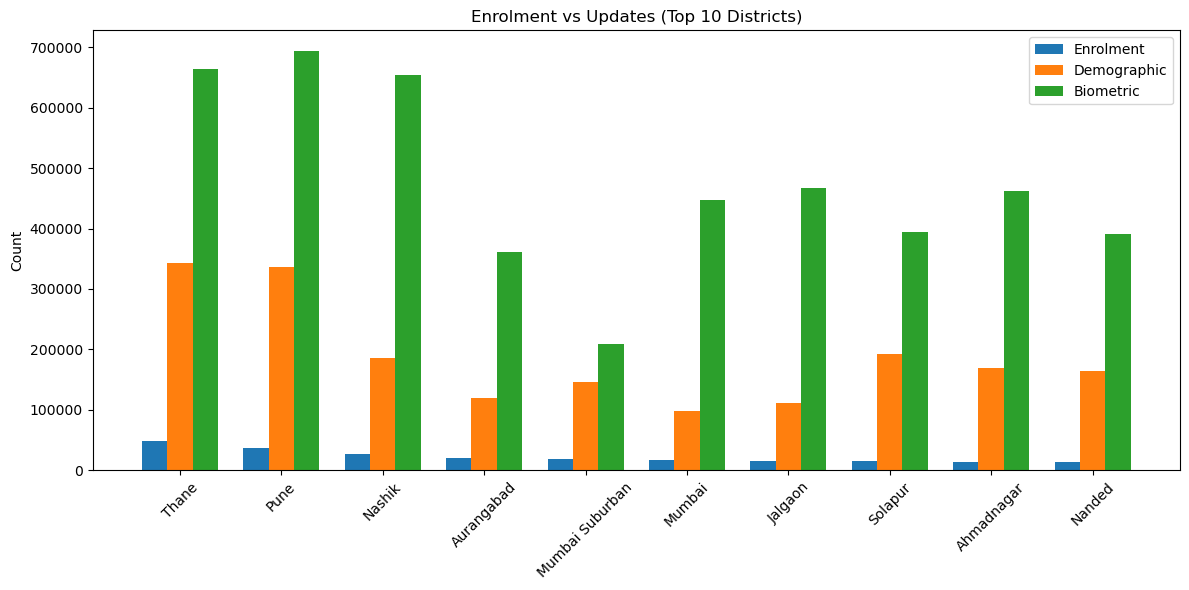

In [28]:

compare_df = heatmap_df.copy()
top10 = compare_df.sort_values('total_enrol', ascending=False).head(10)

x = np.arange(len(top10.index))
width = 0.25

plt.figure(figsize=(12,6))

plt.bar(x - width, top10['total_enrol'], width, label='Enrolment')
plt.bar(x, top10['total_demo'], width, label='Demographic')
plt.bar(x + width, top10['total_bio'], width, label='Biometric')

plt.xticks(x, top10.index, rotation=45)
plt.ylabel("Count")
plt.title("Enrolment vs Updates (Top 10 Districts)")
plt.legend()
plt.tight_layout()
plt.show()
